# Proyek Submission Machine Learning Terapan: Crop Yield Prediction
- **Nama:** Moh Hasbi Rizqulloh
- **Email:** hasbirizqulloh95@gmail.com
- **ID Dicoding:** hasbirizqulloh

# **1. Import Semua Packages/Library yang Digunakan**

In [44]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **2. Data Loading**

In [45]:
# Download latest version
path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-yield-prediction-dataset


In [46]:
os.listdir(path)

['yield_df.csv']

In [47]:
df = pd.read_csv(os.path.join(path, "yield_df.csv"))
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# **3. Eksploratory Data Analysis**

## Mengecek Struktur Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [49]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


Insight
- `hg/ha_yield` Nilai maksimum jauh lebih besar dari Q3 dan median → kemungkinan ada outlier di bagian atas.
- `pesticides_tonnes` Max sangat jauh dari Q3 dan mean ada indikasi kuat outlier atau bisa jadi salah input atau terkendala dengan tahun dan area negara yang menerapkan kebijakan ketat tentang pestisida.
- `avg_temp` Distribusi terlihat normal, tapi nilai minimum 1.3 °C cukup rendah untuk data rata-rata tahunan (kecuali ini dari negara seperti Greenland atau pegunungan tinggi). Perlu dicek datanya berasal dari mana (Area).

## Menangani Missing Values

In [50]:
df.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [51]:
df['Unnamed: 0']

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
28237,28237
28238,28238
28239,28239
28240,28240


In [52]:
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [53]:
df_clean[df_clean['pesticides_tonnes'] == 0.04]

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
6130,Central African Republic,Cassava,1990,28432,1342.0,0.04,25.42
6131,Central African Republic,Maize,1990,7324,1342.0,0.04,25.42
6132,Central African Republic,Plantains and others,1990,26154,1342.0,0.04,25.42
6133,Central African Republic,Potatoes,1990,24509,1342.0,0.04,25.42
6134,Central African Republic,"Rice, paddy",1990,16729,1342.0,0.04,25.42
6135,Central African Republic,Sorghum,1990,7772,1342.0,0.04,25.42
6136,Central African Republic,Yams,1990,65714,1342.0,0.04,25.42
6137,Central African Republic,Cassava,1991,33604,1342.0,0.04,25.45
6138,Central African Republic,Maize,1991,8149,1342.0,0.04,25.45
6139,Central African Republic,Plantains and others,1991,26576,1342.0,0.04,25.45


In [54]:
pestisida = (df_clean.pesticides_tonnes == 0.04).sum()
print(pestisida)

21


In [55]:
df_clean.loc[df_clean['avg_temp'] == 1.3]

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21694,Norway,Potatoes,2010,251662,1414.0,698.98,1.3
21695,Norway,Wheat,2010,45975,1414.0,698.98,1.3


In [56]:
df_clean.shape

(28242, 7)

Insight
- Tidak ada nilai kosong (NaN/null) di semua kolom.
- Terdapat kolom bernama Unnamed yang redundant, kolom ini hanya duplikasi dari index baris. Sudah seharusnya dihapus, karena tidak menambah informasi apa pun.
- Nilai minimum `pesticides_tonnes` adalah 0.04, sangat kecil dibandingkan Q1 (1702) hingga max (367,778). ini akan ditangani di outlier karena setelah di cek bukan karena kesalahan input yang menimbulkan missing values melainkan karena faktor negara dan tahun-tahun awal (1990-an) — wajar untuk masa itu (belum banyak pakai pestisida).
- `avg_temp` minimum untuk suhu rata-rata tahunan 1.3°C di Norway masih masuk akal karena negara Skandinavia yang dingin. ini akan dicek lebih lanjut pada penanganan outlier.
- Bisa langsung lanjut ke eksplorasi data, visualisasi, dan modeling tanpa
hambatan karena missing value.

## Menangangi Outlier

Boxplot untuk Mendeteksi Outlier pada Fitur

<Axes: xlabel='pesticides_tonnes'>

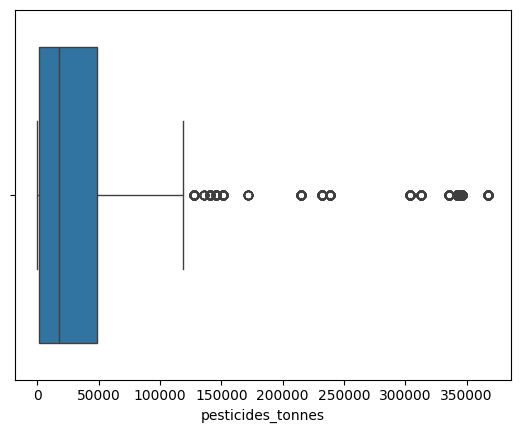

In [57]:
sns.boxplot(x=df_clean['pesticides_tonnes'])

<Axes: xlabel='hg/ha_yield'>

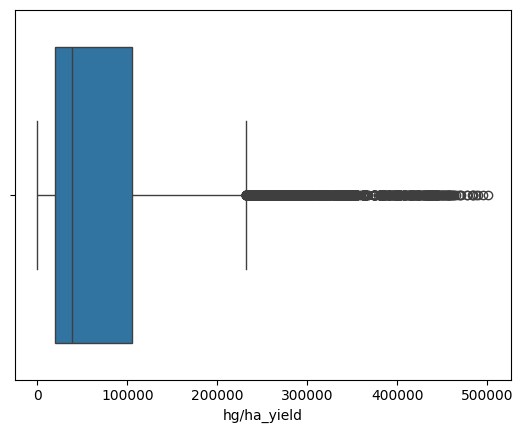

In [58]:
sns.boxplot(x=df_clean['hg/ha_yield'])

<Axes: xlabel='avg_temp'>

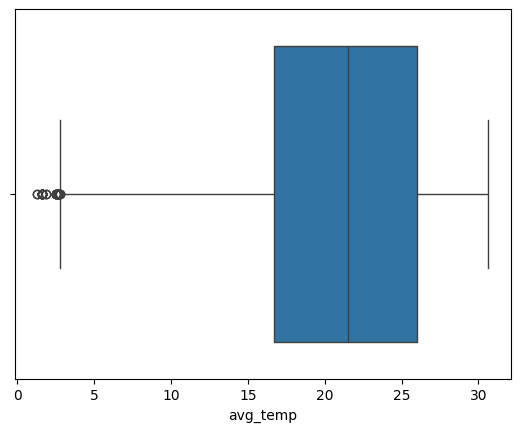

In [59]:
sns.boxplot(x=df_clean['avg_temp'])

Menghapus Outlier Menggunakan Metode IQR (Interquartile Range)

In [60]:
outlier_cols = df_clean[['pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]
Q1 = outlier_cols.quantile(0.25)
Q3 = outlier_cols.quantile(0.75)
IQR = Q3 - Q1

df_clean_ou = df_clean[~((outlier_cols < (Q1 - 1.5 * IQR)) |(outlier_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
df_clean_ou.shape

(24815, 7)

In [62]:
df_clean_ou.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24815 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           24815 non-null  object 
 1   Item                           24815 non-null  object 
 2   Year                           24815 non-null  int64  
 3   hg/ha_yield                    24815 non-null  int64  
 4   average_rain_fall_mm_per_year  24815 non-null  float64
 5   pesticides_tonnes              24815 non-null  float64
 6   avg_temp                       24815 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [63]:
df_clean_ou.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,24815.000000,24815.000000,24815.000000,24815.000000,24815.000000
mean,2001.133186,58591.327745,1131.585775,24710.180347,20.681257
std,7.085674,55817.845694,727.463955,27315.148046,6.312491
min,1990.000000,50.000000,51.000000,0.040000,2.780000
25%,1995.000000,18193.000000,591.000000,1597.000000,16.830000
50%,2000.000000,33427.000000,1083.000000,13435.430000,21.860000
75%,2008.000000,86025.000000,1604.000000,41275.600000,26.090000
max,2013.000000,231535.000000,3240.000000,118930.560000,30.650000


Insight
- Nilai outlier sudah diatasi dengan menggunakan metode IQR, terlihat pada tabel descriptive statisticnya sudah terlihat lebih baik nilai outliernya dibanding sebelumnya.

## Univariate Analysis

### Categorical Features

In [64]:
categorical_features = df_clean_ou.select_dtypes(include='object').columns.tolist()

In [65]:
categorical_features

['Area', 'Item']

##### Visualisasi Jumlah dan Persentase Kategori pada Fitur

            count  percent
Area                      
India        3630     14.6
Pakistan     1449      5.8
Mexico       1368      5.5
Brazil        891      3.6
Indonesia     828      3.3
...           ...      ...
Belgium        26      0.1
Montenegro     24      0.1
Ireland        23      0.1
Norway         23      0.1
Sweden         23      0.1

[101 rows x 2 columns]


<Axes: title={'center': 'Count Distribution for Area'}, ylabel='Area'>

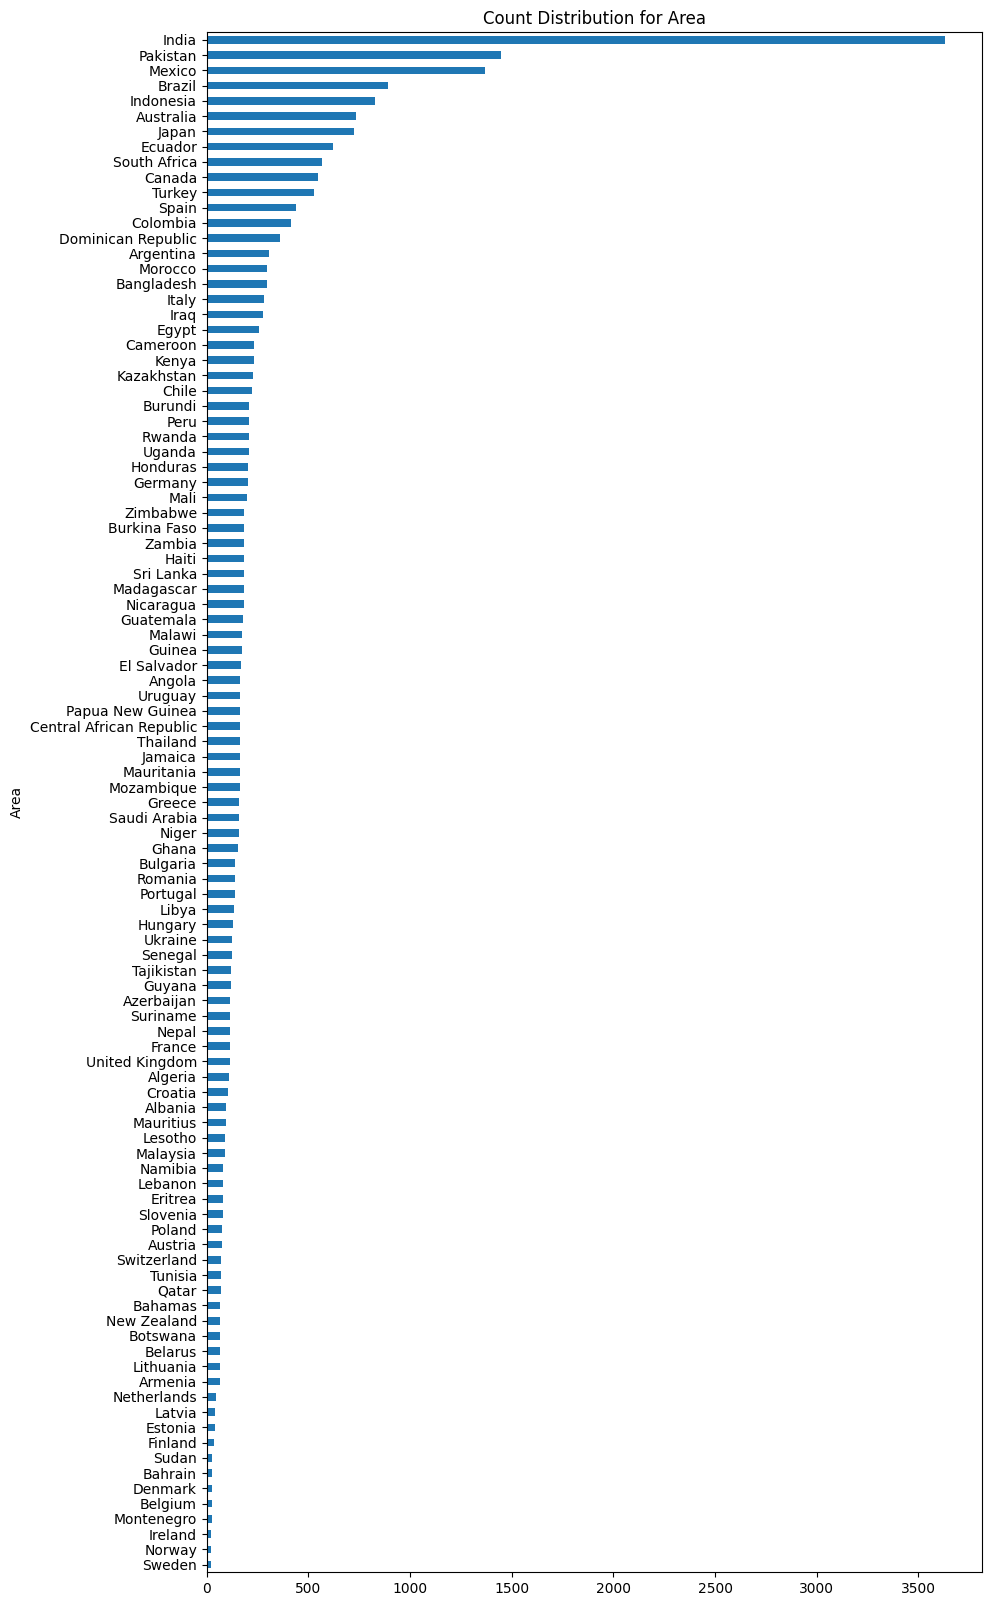

In [66]:
feature = categorical_features[0]
count = df_clean_ou[feature].value_counts()
percent = 100 * df_clean_ou[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count': count, 'percent': percent.round(1)})
print(count_percent)
count.sort_values().plot(kind='barh', figsize=(10, 20), title=f'Count Distribution for {feature}')

                      count  percent
Item                                
Maize                  3959     16.0
Wheat                  3690     14.9
Rice, paddy            3226     13.0
Soybeans               3061     12.3
Sorghum                2877     11.6
Potatoes               2871     11.6
Sweet potatoes         2468      9.9
Cassava                1460      5.9
Yams                    684      2.8
Plantains and others    519      2.1


<Axes: title={'center': 'Count Distribution for Item'}, xlabel='Item'>

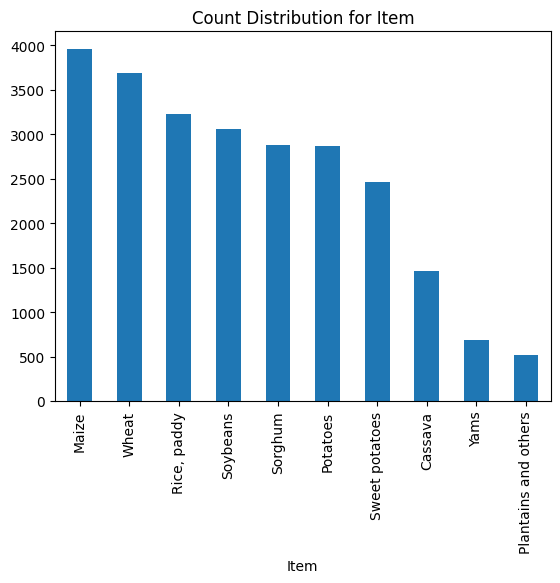

In [67]:
feature = categorical_features[1]
count = df_clean_ou[feature].value_counts()
percent = 100 * df_clean_ou[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count': count, 'percent': percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=f'Count Distribution for {feature}')

### Numerical Features

Visualisasi Distribusi Fitur dengan Histogram

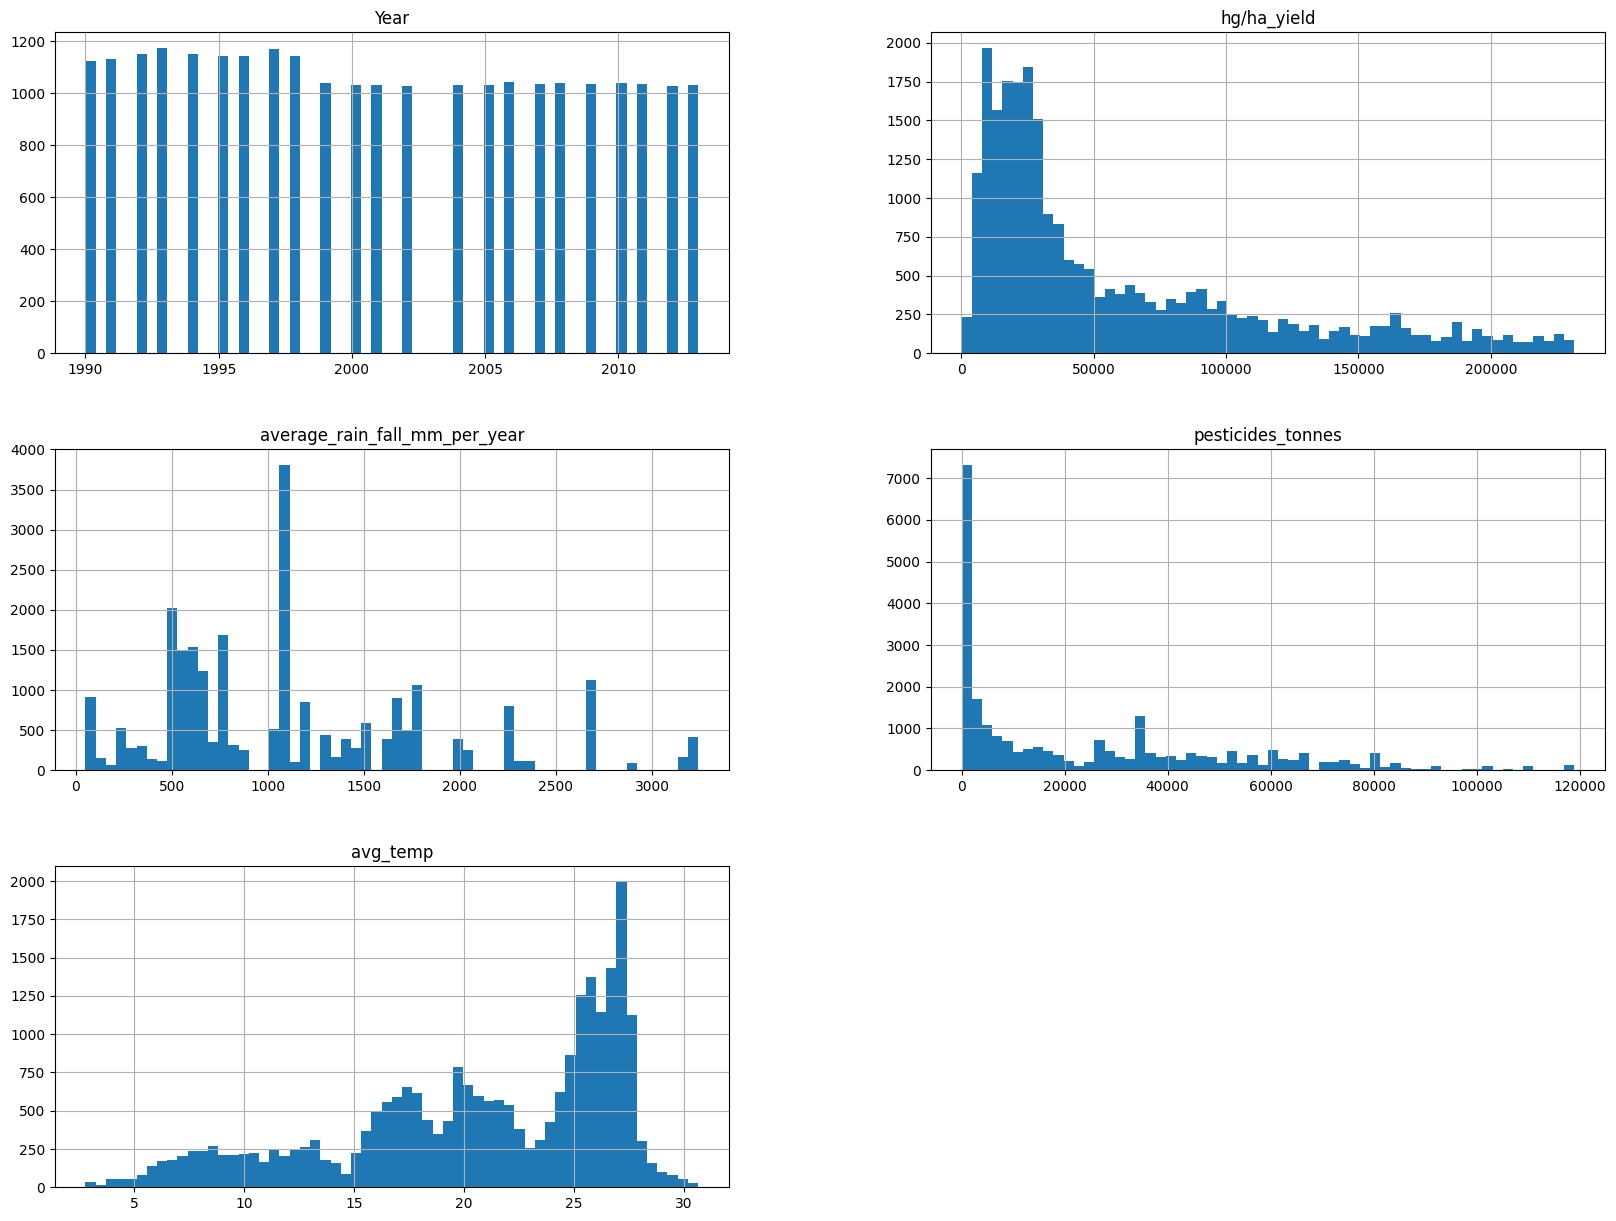

In [68]:
df_clean_ou.hist(bins=60, figsize=(20, 15))
plt.show()

### Multivariate Analysis

Analisis Visual Fitur Kategorikal terhadap Target (hg/ha_yield)

<ipython-input-69-ca8d40155f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='hg/ha_yield', data=df_clean_ou, kind='bar', height=4, aspect=3, palette='Set3')


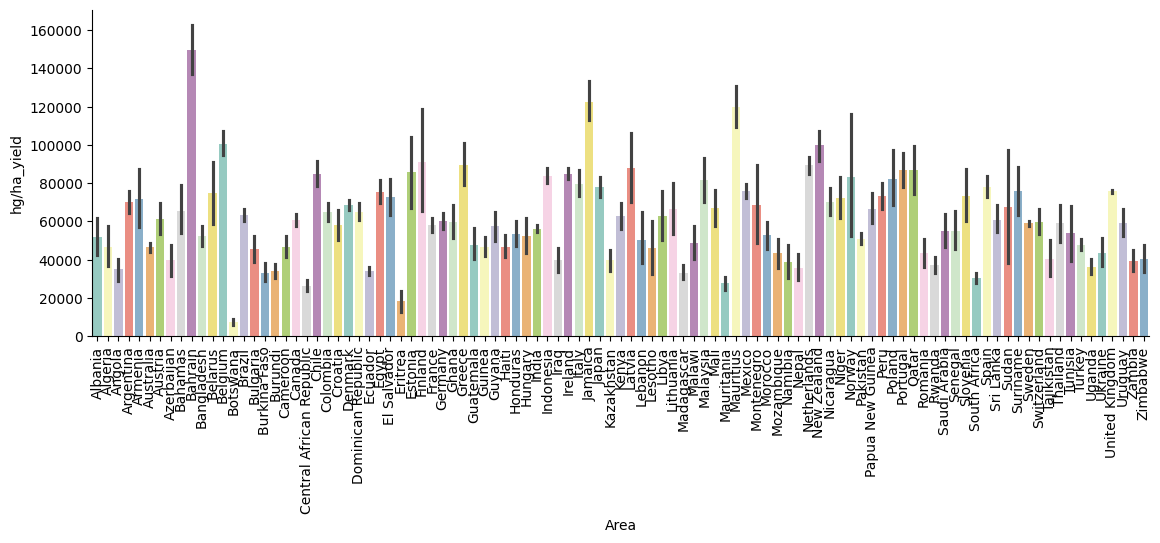

<ipython-input-69-ca8d40155f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='hg/ha_yield', data=df_clean_ou, kind='bar', height=4, aspect=3, palette='Set3')


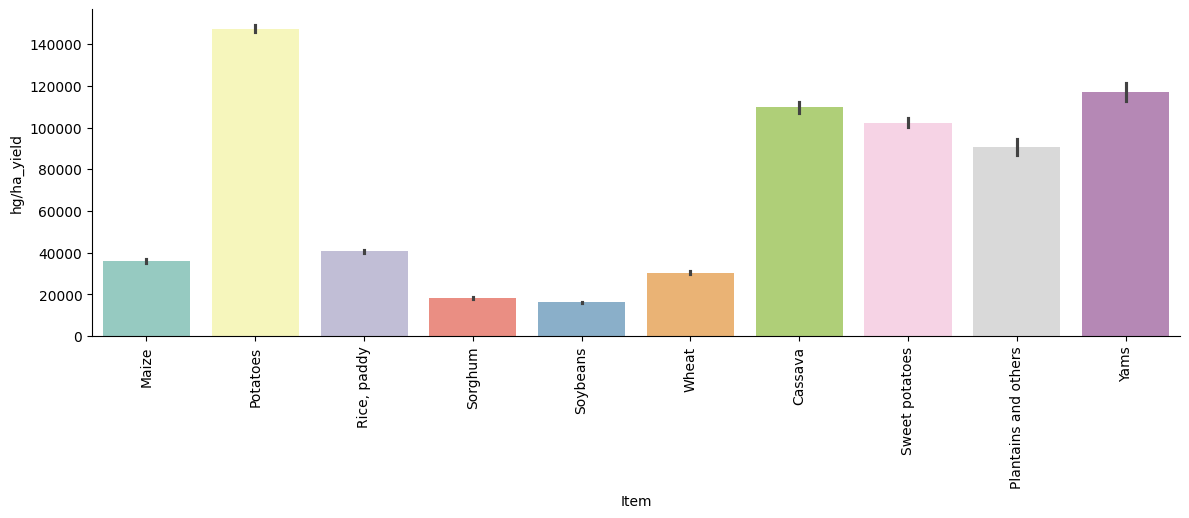

In [69]:
cat_feature = df_clean_ou.select_dtypes(include='object').columns.tolist()
for feature in cat_feature:
    sns.catplot(x=feature, y='hg/ha_yield', data=df_clean_ou, kind='bar', height=4, aspect=3, palette='Set3')
    plt.xticks(rotation=90)
    plt.show()

Visualisasi Hubungan Antar Variabel dengan Pairplot

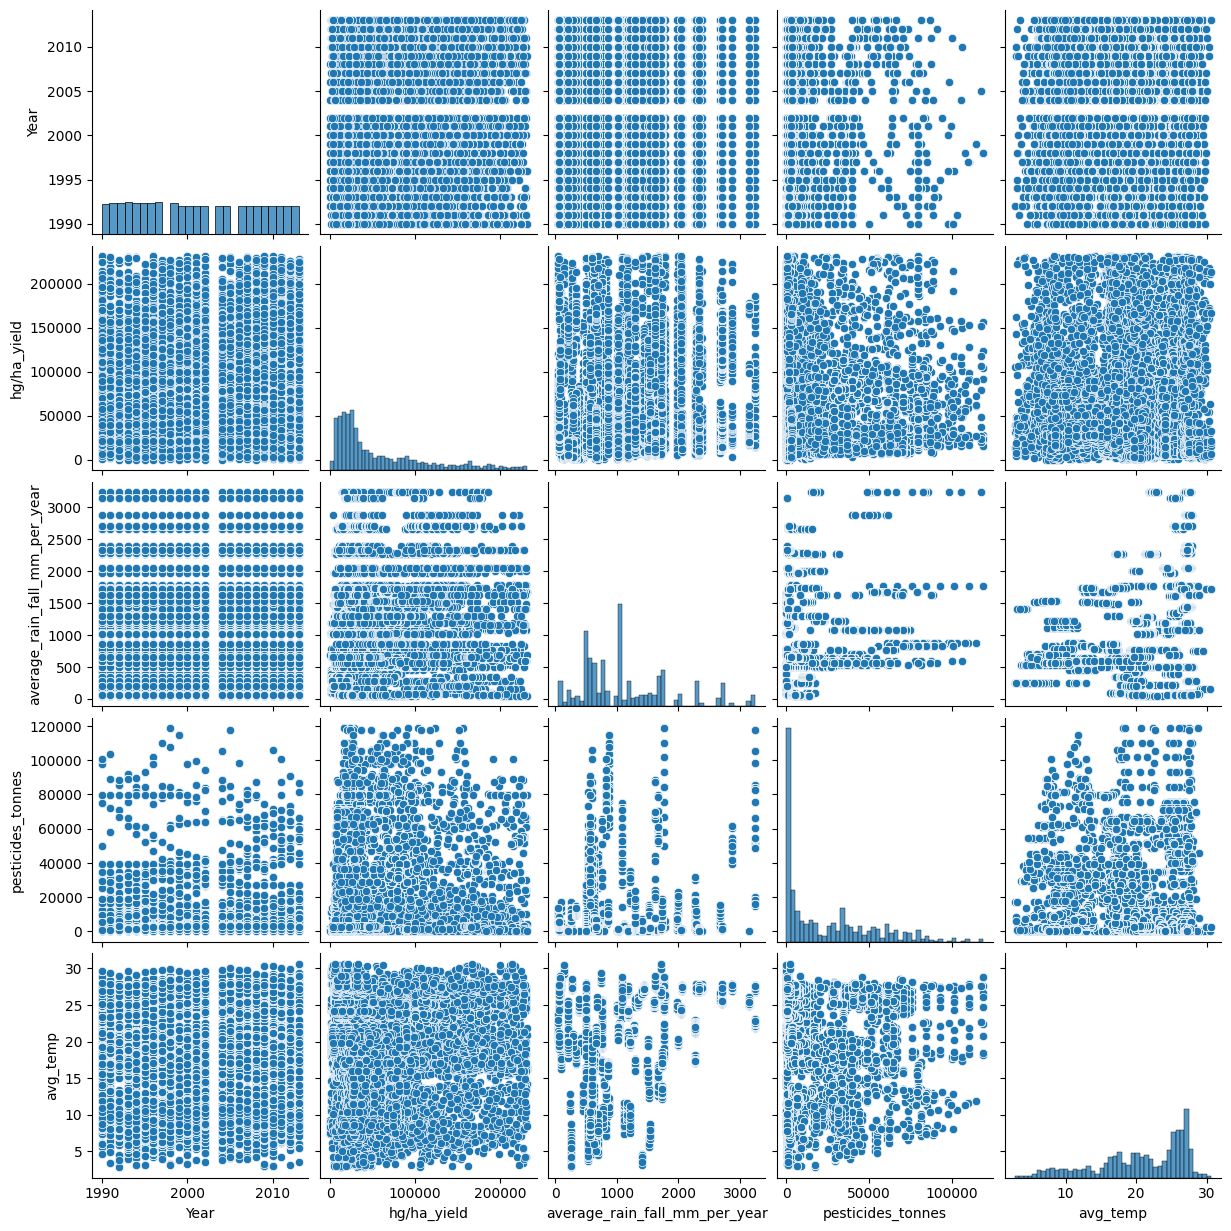

In [70]:
sns.pairplot(df_clean_ou)
plt.show()

Visualisasi Korelasi Fitur Numerik dengan Heatmap

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

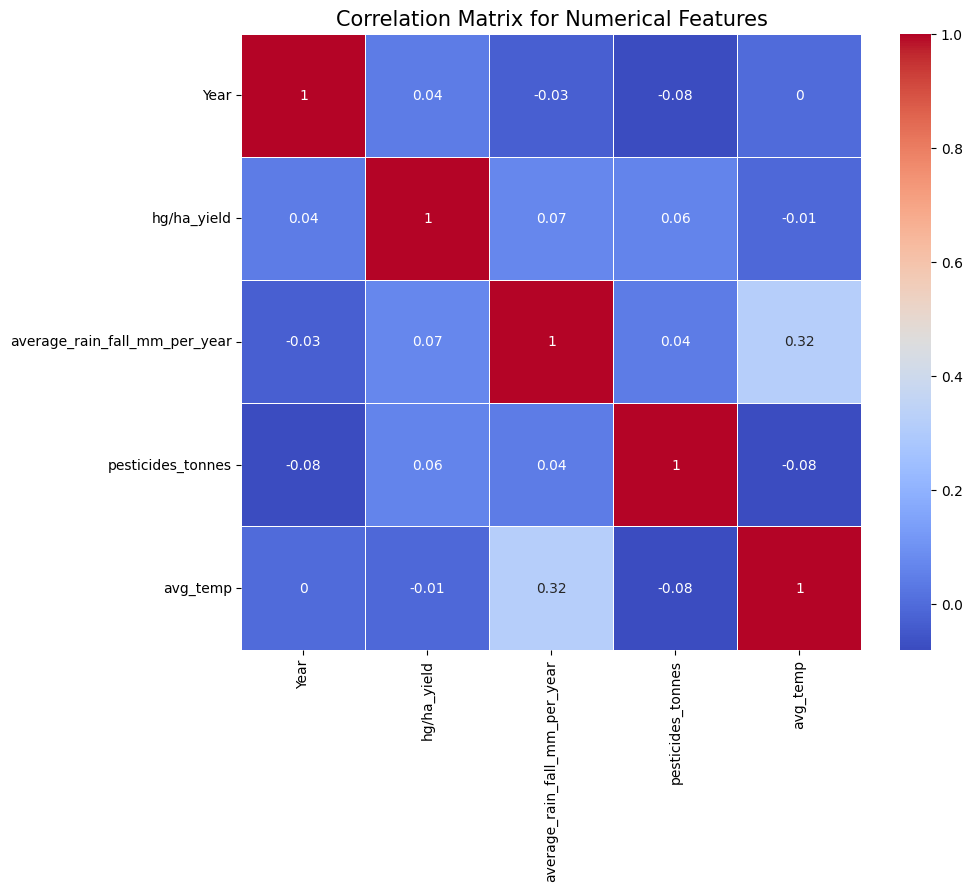

In [71]:
numerical_features = df_clean_ou.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean_ou[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title('Correlation Matrix for Numerical Features', size=15)

In [72]:
df_clean_ou.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# **4. Data Preparation**

## Encoding fitur kategori

### OneHot Encoding

In [73]:
cat_columns = df_clean_ou.select_dtypes(include='object').columns.tolist()

In [74]:
df_onehot_encoded = pd.get_dummies(df, columns=cat_columns)

In [75]:
df_onehot_encoded

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,36613,1485.0,121.00,16.37,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1990,66667,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1990,23333,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1990,12500,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1990,7000,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,28237,2013,22581,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28238,28238,2013,3066,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28239,28239,2013,13142,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28240,28240,2013,22222,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Splitting Data

Menentukan Variabel Fitur dan Target

In [76]:
X = df_onehot_encoded.drop(columns=['hg/ha_yield'])
y = df_onehot_encoded['hg/ha_yield']

Membagi Data Menjadi Data Latih dan Data Uji

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print("Ukuran data latih:", X_train.shape)
print("Ukuran label latih:", y_train.shape)
print("Ukuran data uji:", X_test.shape)
print("Ukuran label uji:", y_test.shape)

Ukuran data latih: (22593, 116)
Ukuran label latih: (22593,)
Ukuran data uji: (5649, 116)
Ukuran label uji: (5649,)


## Reduksi PCA dan Standarisasi

Normalisasi Data Menggunakan StandardScaler pada Data Train dan Test

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Reduksi Dimensi dengan PCA (Principal Component Analysis)

In [80]:
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [81]:
print("Dimensi asli:", X_train.shape[1])
print("Dimensi setelah PCA:", X_train_pca.shape[1])
print("Total variansi terjaga:", np.sum(pca.explained_variance_ratio_))

Dimensi asli: 116
Dimensi setelah PCA: 98
Total variansi terjaga: 0.9073063360800879


# 5. **Model Development**

## Linear Regression

In [82]:
# Inisialisasi model
lr_model = LinearRegression()

# Latih model pada data training
lr_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred = lr_model.predict(X_test_pca)

# Evaluasi performa model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Performance:
RMSE: 54258.52
R² Score: 0.59


## Random Forest Regressor

In [83]:
# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)

# Latih model pada data training
rf_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluasi performa model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Performance:
RMSE: 9548.54
R² Score: 0.99


## Extreme Gradient Boosting

In [84]:
# Inisialisasi model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Latih model pada data training
xgb_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred_xgb = xgb_model.predict(X_test_pca)

# Evaluasi performa model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Performance:")
print(f" RMSE : {rmse_xgb:.2f}")
print(f" R²   : {r2_xgb:.2f}")

XGBoost Regression Performance:
 RMSE : 11962.52
 R²   : 0.98


# **6. Evaluasi Model**

### Menghitung MSE (Mean Squared Error) untuk Data Train dan Test pada Masing-Masing Algoritma

In [85]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': lr_model, 'RF': rf_model, 'Boosting': xgb_model}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_pca))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_pca))/1e3

# Panggil mse
mse

,train,test
LR,3014327.59408,2943986.619316
RF,20567.551203,91174.55312
Boosting,94251.84,143101.776


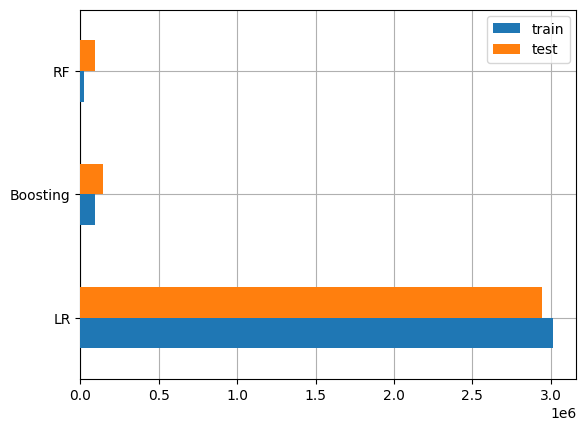

In [86]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Prediksi Menggunakan Model pada Data Uji (Test Data) untuk Evaluasi

In [89]:
prediksi = X_test_pca[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RF,prediksi_Boosting
25564,69220,68915.5,71228.0,76691.296875
